# INFO 5770 Data Analysis of Heart Failure Using the Medical Expenditure Panel Survey (MEPS) Dataset Phase 2

In [35]:
#loading the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print("Libraries loaded successfully!")

Libraries loaded successfully!


In [36]:
# Load the heart failure dataset
data = pd.read_csv("C:\\Users\\n\\Downloads\\archive (11)\\heart_failure_clinical_records_dataset.csv")

In [37]:
#Visualize the first five elements of the Dataset
data.head()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2        1     7            1  
3        0     7            1  
4        0     8            1

In [38]:
#Visualize the Last five values of the Datast
data.tail()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
294                    1   155000.0               1.1           143    1   
295                    0   270000.0               1.2           139    0   
296                    0   742000.0               0.8           138    0   
297                    0   140000.0               1.4           140    1   
298                    0   395000.0               1.6           136    1   

     smoking  time  DEATH_EVENT  
294        1   270            0  
295        0   271            0  
296        0   278            0  
297        1   280            0  
298        1   285            0

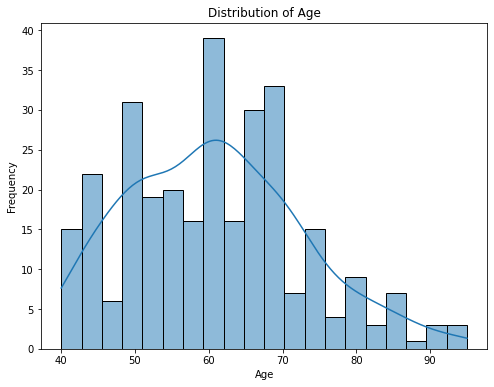

In [39]:
# Visualize the distribution of age
plt.figure(figsize=(8, 6))
sns.histplot(data['age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# 1. Variable Selection

In [40]:
# 1. Variable Selection
selected_variables = ['age', 'anaemia', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'serum_creatinine', 'time']
data = data[selected_variables]
print(data)

      age  anaemia  diabetes  ejection_fraction  high_blood_pressure  \
0    75.0        0         0                 20                    1   
1    55.0        0         0                 38                    0   
2    65.0        0         0                 20                    0   
3    50.0        1         0                 20                    0   
4    65.0        1         1                 20                    0   
..    ...      ...       ...                ...                  ...   
294  62.0        0         1                 38                    1   
295  55.0        0         0                 38                    0   
296  45.0        0         1                 60                    0   
297  45.0        0         0                 38                    0   
298  50.0        0         0                 45                    0   

     serum_creatinine  time  
0                 1.9     4  
1                 1.1     6  
2                 1.3     7  
3              

# 2. Handling Missing Data (No missing data observed)

In [41]:
#Check for Missing values
print(data.isna())
# 2. Handling Missing Data (No missing data observed)

       age  anaemia  diabetes  ejection_fraction  high_blood_pressure  \
0    False    False     False              False                False   
1    False    False     False              False                False   
2    False    False     False              False                False   
3    False    False     False              False                False   
4    False    False     False              False                False   
..     ...      ...       ...                ...                  ...   
294  False    False     False              False                False   
295  False    False     False              False                False   
296  False    False     False              False                False   
297  False    False     False              False                False   
298  False    False     False              False                False   

     serum_creatinine   time  
0               False  False  
1               False  False  
2               False  False  

# 3. Outlier Detection and Removal (Tukey's Fences method

In [42]:
# 3. Outlier Detection and Removal (Tukey's Fences method)
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

outlier_sensitive_columns = ['age', 'ejection_fraction', 'serum_creatinine', 'time']
data = remove_outliers(data, outlier_sensitive_columns)
print("The outlier_sensitive_columns are: ",outlier_sensitive_columns )
print(data)

The outlier_sensitive_columns are:  ['age', 'ejection_fraction', 'serum_creatinine', 'time']
      age  anaemia  diabetes  ejection_fraction  high_blood_pressure  \
0    75.0        0         0                 20                    1   
1    55.0        0         0                 38                    0   
2    65.0        0         0                 20                    0   
3    50.0        1         0                 20                    0   
5    90.0        1         0                 40                    1   
..    ...      ...       ...                ...                  ...   
294  62.0        0         1                 38                    1   
295  55.0        0         0                 38                    0   
296  45.0        0         1                 60                    0   
297  45.0        0         0                 38                    0   
298  50.0        0         0                 45                    0   

     serum_creatinine  time  
0           

# 4. Creating New Attribute: Interaction between serum_creatinine and ejection_fraction

In [43]:
# 4. Creating New Attribute: Interaction between serum_creatinine and ejection_fraction
data['serum_creatinine*ejection_fraction'] = data['serum_creatinine'] * data['ejection_fraction']
print("The New Attribute from the Interaction between serum_creatinine and ejection_fraction are:\n",data)

The New Attribute from the Interaction between serum_creatinine and ejection_fraction are:
       age  anaemia  diabetes  ejection_fraction  high_blood_pressure  \
0    75.0        0         0                 20                    1   
1    55.0        0         0                 38                    0   
2    65.0        0         0                 20                    0   
3    50.0        1         0                 20                    0   
5    90.0        1         0                 40                    1   
..    ...      ...       ...                ...                  ...   
294  62.0        0         1                 38                    1   
295  55.0        0         0                 38                    0   
296  45.0        0         1                 60                    0   
297  45.0        0         0                 38                    0   
298  50.0        0         0                 45                    0   

     serum_creatinine  time  serum_creatini

# 5. Checking Redundancy (Correlation matrix)

In [44]:
# 5. Checking Redundancy (Correlation matrix)
correlation_matrix = data.corr()
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                                         age   anaemia  diabetes  \
age                                 1.000000  0.077862 -0.085132   
anaemia                             0.077862  1.000000 -0.030597   
diabetes                           -0.085132 -0.030597  1.000000   
ejection_fraction                   0.082396  0.036037  0.017218   
high_blood_pressure                 0.085588  0.035145  0.030729   
serum_creatinine                    0.264774 -0.011626  0.034142   
time                               -0.210500 -0.127014  0.059998   
serum_creatinine*ejection_fraction  0.275187  0.030327  0.026351   

                                    ejection_fraction  high_blood_pressure  \
age                                          0.082396             0.085588   
anaemia                                      0.036037             0.035145   
diabetes                                     0.017218             0.030729   
ejection_fraction                            1.000000  

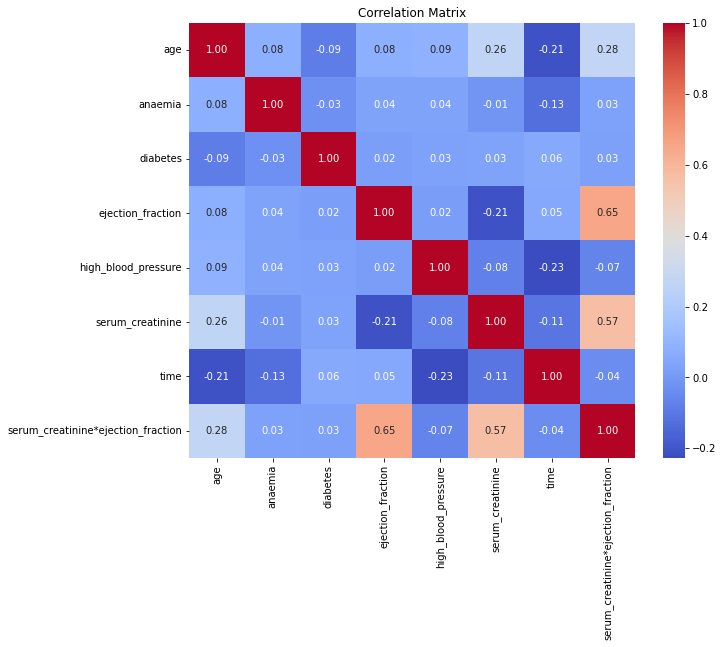

In [45]:
# Visualize the correlation matrix
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# 6. Data Normalization (Min-Max scaling)

In [46]:
# 6. Data Normalization (Min-Max scaling)
def min_max_scaling(df, columns):
    for col in columns:
        min_val = df[col].min()
        max_val = df[col].max()
        df[col] = (df[col] - min_val) / (max_val - min_val)
    return df

normalized_columns = ['age', 'ejection_fraction', 'serum_creatinine', 'time', 'serum_creatinine*ejection_fraction']
data = min_max_scaling(data, normalized_columns)

# Print the preprocessed dataset
print("Preprocessed Dataset:")
print(data.head())

# Save the preprocessed dataset to a new CSV file in a desktop directory
data.to_csv("C:/Users/n/Desktop/preprocessed_heart_failure_data.csv", index=False)
print("\n")
print("Successfully Saved!")

Preprocessed Dataset:
        age  anaemia  diabetes  ejection_fraction  high_blood_pressure  \
0  0.636364        0         0           0.117647                    1   
1  0.272727        0         0           0.470588                    0   
2  0.454545        0         0           0.117647                    0   
3  0.181818        1         0           0.117647                    0   
5  0.909091        1         0           0.509804                    1   

   serum_creatinine      time  serum_creatinine*ejection_fraction  
0             0.875  0.000000                            0.287245  
1             0.375  0.007117                            0.327974  
2             0.500  0.010676                            0.158628  
3             0.875  0.010676                            0.287245  
5             1.000  0.014235                            0.780279  


Successfully Saved!


In [47]:
#THE END OF PHASE 2 ANALYSIS